# Derivadas segundas do potencial gravitacional produzido por um prisma

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism
from fatiando.vis import mpl

### Modelo de prisma

In [2]:
model = [mesher.Prism(-500., 500., -500., 500., 10., 1010., \
                      {'density': 2000.})]

In [3]:
# Projeção horizontal do modelo
projecao = []
for i, p in enumerate(model):
    projecao.append(p.get_bounds()[:4])

### Pontos onde são calculados os dados

In [4]:
shape = (100, 100) # número de pontos ao longo de x e y
area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

### Componentes do tensor gradiente (em Eötvös)

In [5]:
gxx = prism.gxx(xp, yp, zp, model)
gxy = prism.gxy(xp, yp, zp, model)
gxz = prism.gxz(xp, yp, zp, model)
gyy = prism.gyy(xp, yp, zp, model)
gyz = prism.gyz(xp, yp, zp, model)
gzz = prism.gzz(xp, yp, zp, model)

### Componente vertical da atração gravitacional (em mGal)

In [6]:
gz = prism.gz(xp, yp, zp, model)

### Plot da anomalia de campo total

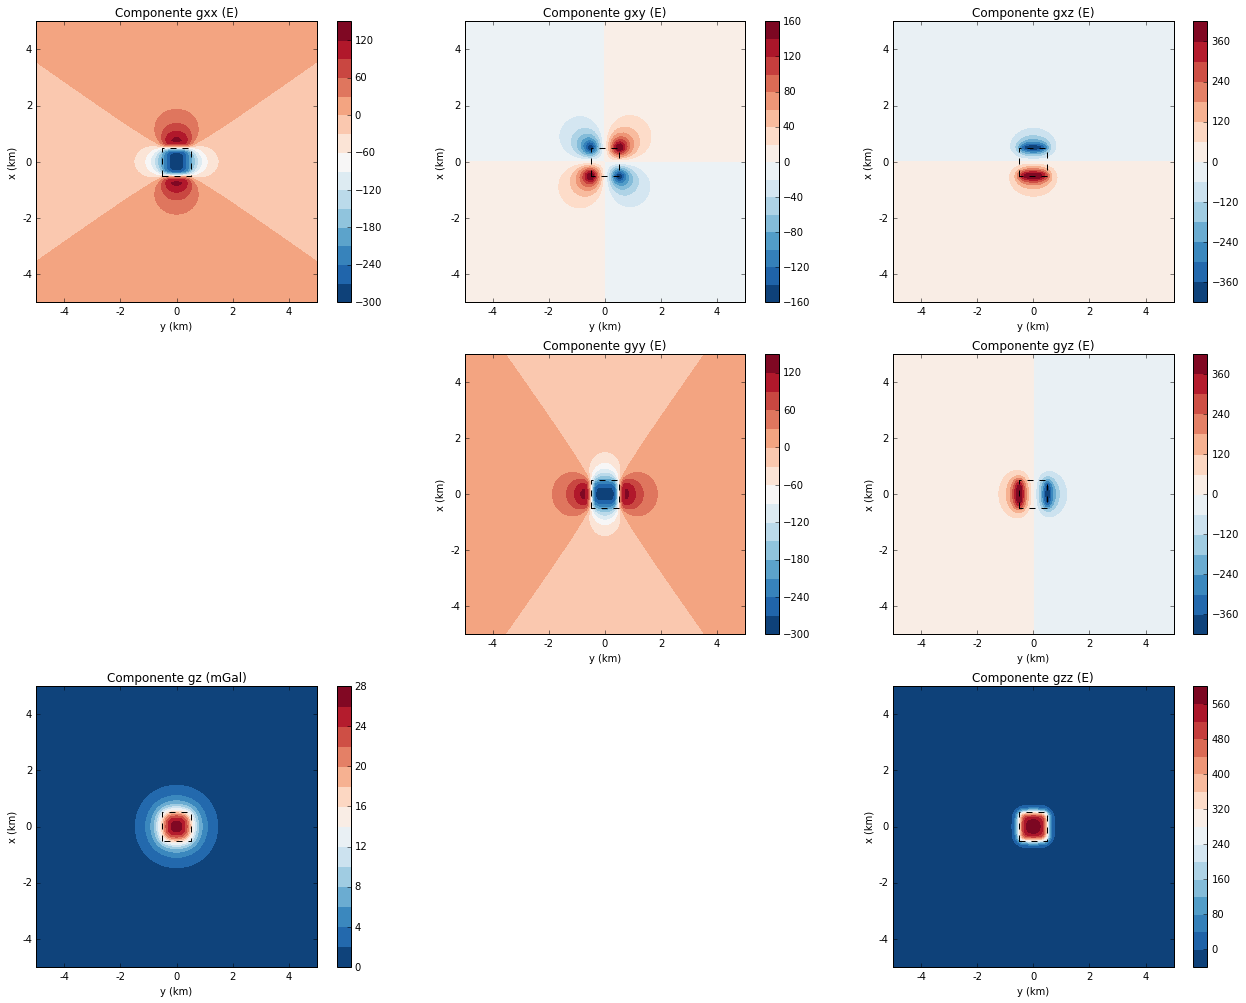

In [8]:
mpl.close('all')
mpl.figure(figsize=(18,14))

mpl.subplot(3,3,1)
mpl.title("Componente gxx (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxx, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,2)
mpl.title("Componente gxy (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxy, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,3)
mpl.title("Componente gxz (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,5)
mpl.title("Componente gyy (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gyy, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,6)
mpl.title("Componente gyz (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gyz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,9)
mpl.title("Componente gzz (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gzz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,7)
mpl.title("Componente gz (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout()

mpl.show()